**Dataset**: Real-world masked credit card applications data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/)

**Task**: Fraud detection using Self Organizing Map (SOM)

In [1]:
## imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## load dataset
data = pd.read_csv('Credit_Card_Applications.csv')
data.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
## feature label split
X = data.iloc[:,:-1].values ## keeping customer id to identify fraud instances later from the original dataset
y = data.iloc[:,-1].values

In [4]:
## feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

In [5]:
X.shape

(690, 15)

In [6]:
y[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [7]:
from minisom import MiniSom
som = MiniSom(x=int(np.sqrt(data.shape[0])), y=int(np.sqrt(data.shape[0])), input_len= 15, sigma= 1.0, learning_rate = 0.5) 
## sigma-->radius of neighborhoods in the SOM grid
som.random_weights_init(X) ## initialize random weight for each SOM node
som.train_random(data = X, num_iteration = 100)

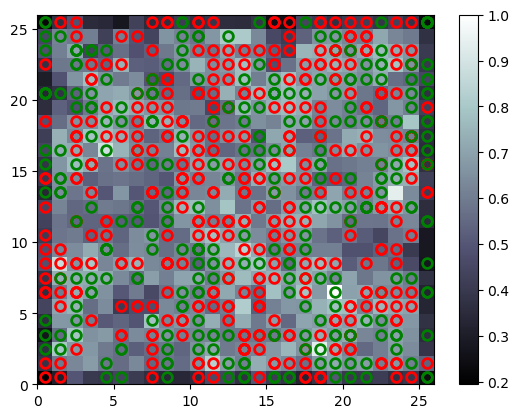

red --> fraud that got approval, green --> fraud that did not get approval, rest --> not frauds


In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T) ## som.distance_map() --> Mean Interneuron Distance (MID) for each winning node identified by SOM
colorbar() ## to reference MID against colored grid
## Big value of MID --> nodes are outliers in their neighborhoods (defined by radius) --> outliers --> fraud
colors = ['r', 'g']
for i, x in enumerate(X): ## i-->index, x-->feature_vector
    w = som.winner(x) ## w --> winning node for feature vector at index i
    plot(w[0] + 0.5, ## x coordinate of center of winning SOM node
         w[1] + 0.5, ## y coordinate of center of winning SOM node
         'o', ## 
         markeredgecolor = colors[y[i]], ## r --> approved (high priority fraud), g --> not approved (preventable fraud)
         markerfacecolor = 'None',
         markersize = 7,
         markeredgewidth = 2)
show()

print('red --> fraud that got approval, green --> fraud that did not get approval, rest --> not frauds')

**Note**: The markers are the coordinates of the winning node corresponding to the fraud in the SOM map.